Práctica Guiada.

1.  En esta práctica se pide realizar pruebas utilizando   diferentes funciones de pérdida. 

2.  Su equipo debe implementar el algoritmo de machine learning para  regresión múltiple y realizar las correspondientes pruebas el siguiente  [Dataset](https://drive.google.com/file/d/1M45hcrUebHBOjrp5tB2UQawepqTl71hB/view?usp=sharing). \\

3.  Deberá seleccionar del Dataset un 70% para entrenamiento y un 30% para realizar *testing*. Recuerde que los datos tanto para entrenamieto como para *testing* deben ser tomados aleatoriamente \\

4. Utilizar las siguientes funciones de pérdida para realizar las comparaciones. Además, recuerde que las derivadas van a cambiar cada vez que cambie le función de pérdida.

  *   MSE Loss Function \\

    $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i)) ²$ \\

  *   MAE Loss Function \\
$MAE = \frac{1}{m}\sum_{i=0}^m |y_i - h(x_i)|$ \\

  *   Hubber Loss Function \\
\begin{align}
L(y,h(x)) = \left\{ \begin{array}{cl}
\frac{1}{2} \left[y-h(x)\right]^2 & \text{for }|y-h(x)| \le \delta, \\
\delta \left(|y-h(x))|-\delta/2\right) & \text{otherwise.}
\end{array}\right.
\end{align} \\

  *   Log cosh Loss \\
  $LCE = \sum_{i=0}^m \log(cosh(y_i - h(x_i)))$  \\

 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

Crear el DataSet







In [ ]:
drive.mount ("/content/gdrive")

data = pd.read_csv('gdrive/My Drive/data1.csv')

X = pd.DataFrame(data, columns = ['medv','age'])
Y = pd.DataFrame(data, columns = ['lstat'])

X =normalize(X)
Y = normalize(Y)
#X = X.to_numpy()
#Y = Y.to_numpy()
Y = Y.ravel()




X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Modelo 
$h(x_i) = x_i*w + b$

In [ ]:
def h(x,w,b):
  return np.dot(x,w)+b

# Loos function

$L = \frac{1}{2m}\sum_{i=0}^m(y_i - h(x_i))^2$

In [ ]:
def Error(x,y,w,b):
  sum = 0
  for i in range(len(x)): 
    sum += (y[i] - h(x[i],w,b))**2 
  sum = sum / (2*len(x))
  return sum

$db = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-1)$

$dw = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_i)$ 



In [ ]:
def derivada(x,y,w,b):
  # write your code here
  db = 0
  dw = np.zeros(len(w))

  for i in range(len(x)):
    db += (y[i] - h(x[i],w,b))*(-1)
    for j in range(len(x[i])):
      dw[j] += (y[i] - h(x[i],w,b))*(-x[i][j])
    
    db = db/len(x)
    dw = dw/len(x)
    
  return db, dw

In [ ]:
def update(w,b, alfa,db,dw):
  # write your code here
  b = b - alfa*(db)
  for i in range(len(dw)):
    w[i] = w[i] - alfa*(dw[i])
  return b,w

In [ ]:
def train(x,y,umbral, alfa):
  w = np.random.rand(2) # pendientes
  w = np.reshape(w,(2,1)) # np.reshape(w,(len(w),1))
  b = np.random.rand() # bias

  L = Error(x,y,w,b)
  i=0
  while(L > umbral):
    db, dw = derivada(x,y,w,b)  #db = numero, dw = arreglo
    b,w = update(w,b,alfa,db,dw) 
    L = Error(x,y,w,b) 
    if(i%100==0):
      plt.plot(x,[h(xi,w,b) for xi in x])
      print(L)   
    i=i+1   
  return b,w




In [ ]:
from sklearn.metrics import mean_squared_error
def test(x,y,w,b):
  # write your code here
  Y_pred = np.zeros(len(x), dtype = float)
  for i in range(len(x)):
    Y_pred[i] = (h(x[i],w,b))
  print(mean_squared_error(y, Y_pred))


coeficientes:  [[0.07079147]
 [0.38179194]] [0.41766977]
[0.02443544]
coeficientes:  [[0.07161145]
 [0.38707874]] [0.42301988]
[0.02227426]
coeficientes:  [[0.07238625]
 [0.39207426]] [0.42807521]
[0.02033108]
coeficientes:  [[0.07311837]
 [0.39679455]] [0.43285202]
[0.0185833]
coeficientes:  [[0.07381015]
 [0.40125476]] [0.43736564]
[0.01701067]
coeficientes:  [[0.07446382]
 [0.40546923]] [0.44163058]
[0.01559511]
coeficientes:  [[0.07508148]
 [0.4094515 ]] [0.44566053]
[0.0143204]
coeficientes:  [[0.0756651 ]
 [0.41321436]] [0.44946845]
[0.01317205]
coeficientes:  [[0.07621657]
 [0.41676991]] [0.45306656]
[0.01213709]
coeficientes:  [[0.07673766]
 [0.42012955]] [0.45646644]
[0.0112039]
coeficientes:  [[0.07723004]
 [0.42330409]] [0.45967899]
[0.01036208]
coeficientes:  [[0.07769529]
 [0.42630372]] [0.46271454]
[0.0096023]
coeficientes:  [[0.07813491]
 [0.42913808]] [0.46558285]
[0.00891624]
coeficientes:  [[0.0785503 ]
 [0.43181629]] [0.46829312]
[0.00829641]
coeficientes:  [[0.07894

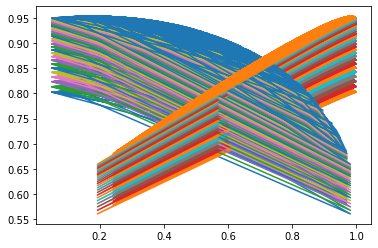

In [ ]:
b,w = train(X_train,y_train, 0.004, 0.1)
print(b,w)
#test(x,y,w,b)

In [ ]:
test(X_test,y_test,w,b)

0.010027379710004064
